# 🔴 Task 24-> Evaluation Techniques for Regression Models

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [40]:
car_df = pd.read_csv('cardata.csv') 
dfb = car_df[['Selling_Price', 'Present_Price']] 
dfb.columns = ['Selling_Price', 'Present_Price'] 
dfb.head()

Selling_Price  Present_Price
0           3.35           5.59
1           4.75           9.54
2           7.25           9.85
3           2.85           4.15
4           4.60           6.87

In [6]:
dfb.ffill()
X = np.array(dfb['Selling_Price']).reshape(-1, 1) 
y = np.array(dfb['Present_Price']).reshape(-1, 1) 
dfb.dropna() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.8219157733044179


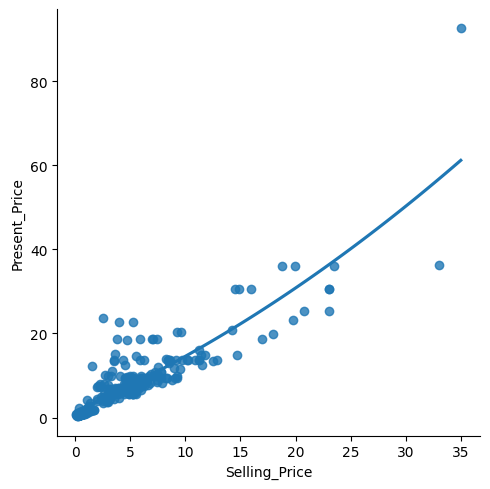

In [7]:
dfb2 = dfb[:][:500] 
sns.lmplot(x ="Selling_Price", y ="Present_Price", data = dfb2, order = 2, ci = None)

In [8]:
dfb2.ffill()  
X = np.array(dfb2['Selling_Price']).reshape(-1, 1) 
y = np.array(dfb2['Present_Price']).reshape(-1, 1) 
  
dfb2.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.7150362685929944


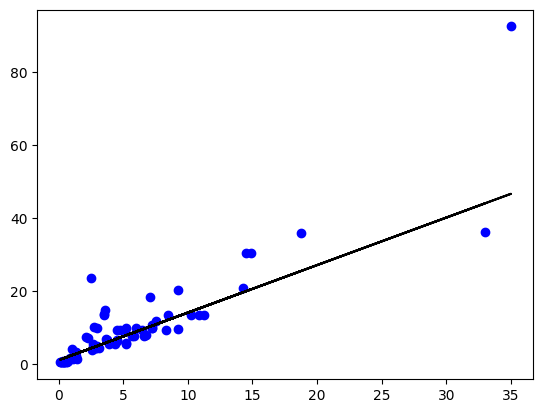

In [9]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [27]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
num_features = 2

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 3.0094537945437767
MSE: 44.25736180006222
RMSE: 6.6526206715896725


In [34]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def adjusted_r_squared(y_true, y_pred, num_features, r_squared_value):
    n = len(y_true)
    adjusted_r_squared = 1 - (1 - r_squared_value) * (n - 1) / (n - num_features - 1)
    return adjusted_r_squared

def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [35]:
r_s = r_squared(y_test, y_pred)
ar_s = adjusted_r_squared(y_test, y_pred, num_features, r_s)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [39]:
print(f"R-Squared: {r_s}")
print(f"Adjusted R-Squared: {ar_s}")
print(f"Mean Absolute Percentage Error: {mape}%")

R-Squared: 0.7150362685929944
Adjusted R-Squared: 0.7072290430749942
Mean Absolute Percentage Error: 49.92650650036145%
